# ANN for Power Plant Energy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Data Preprocessing

### Importing the Dataset

In [2]:
dataset = pd.read_excel("Dataset/Folds5x2_pp.xlsx")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
X = dataset[["AT","V","AP","RH"]].values
y = dataset["PE"].values

In [4]:
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [5]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

### Splitting the Dataset

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Building the ANN

### Initializing the ANN

In [7]:
ann = tf.keras.models.Sequential()

### Adding the Input layer and the First Hidden Layer

In [8]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu",input_shape=(X_train.shape[1],)))

### Adding the Second Hidden Layer

In [9]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

### Adding the Output Layer

In [10]:
ann.add(tf.keras.layers.Dense(units=1))

# Training the ANN

### Compiling the ANN

In [11]:
ann.compile(optimizer="adam",loss="mean_squared_error")

### Training the ANN on the Training Set

In [12]:
history = ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 125187.6875
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 2380.8203
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 97.2449
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 85.8013
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 83.8951
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 82.1989
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 80.4063
Epoch 8/100
240/240 [==============================] - 1s 4ms/step - loss: 78.3332
Epoch 9/100
240/240 [==============================] - 1s 4ms/step - loss: 76.1701
Epoch 10/100
240/240 [==============================] - 1s 4ms/step - loss: 73.7311
Epoch 11/100
240/240 [==============================] - 1s 5ms/step - loss: 71.0002
Epoch 12/100
240/240 [==============================] - 1s 5ms/step - loss: 68.

### Predicting the Results of the Test Set

In [13]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 [==============================] - 0s 1ms/step
[[457.93 455.27]
 [439.83 436.31]
 [434.91 440.68]
 ...
 [482.31 479.53]
 [437.03 435.76]
 [460.92 457.1 ]]


# Actual vs. Predicted Values

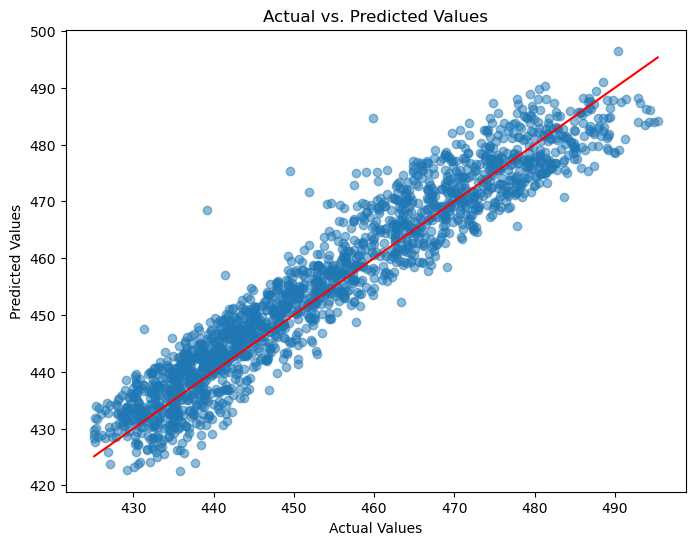

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r")  # Perfect prediction line
plt.savefig("Results/actual_vs_predicted.png")
plt.show()